# 分類器の精度指標

## Confusion Matrix

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
y_col = 'species'
X = df.drop(columns = [y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# モデル学習
model = LogisticRegression(penalty = 'none')
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

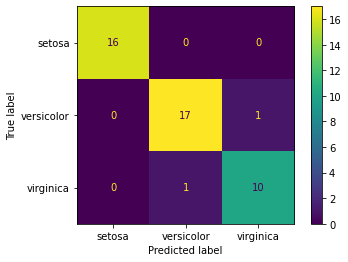

In [4]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()

In [5]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Accuracy

In [6]:
# サンプルデータ
y_true = [1,1,0,1,0,0,1,1]
y_pred = [1,1,1,0,0,1,0,1]

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5

## Precision

In [8]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.6

## Recall

In [9]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.6

## Specificity

- Specificityはsklearnで対応していない
- 0と1を逆転させることで評価する

In [10]:
import numpy as np
np.array(y_true) != 1

array([False, False,  True, False,  True,  True, False, False])

In [11]:
recall_score(np.array(y_true) != 1, np.array(y_pred) != 1)

0.3333333333333333

## 多クラス評価におけるPrecision

In [12]:
y_col = 'species'
X = df.drop(columns = [y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# モデル学習
model = LogisticRegression(penalty = 'none')
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

In [13]:
# average = None (各クラスのprecision)
print(precision_score(y_test, y_pred, average = None))
# average = macro
print(precision_score(y_test, y_pred , average = 'macro'))
# average = micro precisionのmicroとaccuracyは同じ
print(precision_score(y_test, y_pred , average = 'micro'))
print(accuracy_score(y_test, y_pred))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556
0.9555555555555556


In [14]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Precision Recall Curve

In [15]:
import pandas as pd
df = pd.read_csv('heart_preprocessed.csv')
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#　モデル構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred_proba[:10]

array([[0.49520585, 0.50479415],
       [0.28366802, 0.71633198],
       [0.99732492, 0.00267508],
       [0.06897633, 0.93102367],
       [0.47851468, 0.52148532],
       [0.99002332, 0.00997668],
       [0.66307864, 0.33692136],
       [0.7927538 , 0.2072462 ],
       [0.3021324 , 0.6978676 ],
       [0.3021324 , 0.6978676 ]])

In [16]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

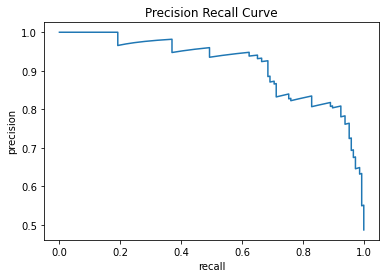

In [17]:
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [18]:
# recallとprecisionの最後の要素はそれぞれ0, 1で，それに対応するthresholdsはない
print(recall[-1])
print(precision[-1])
print(len(recall))
print(len(precision))
print(len(thresholds))

0.0
1.0
210
210
209


## F値

In [19]:
from sklearn.metrics import f1_score, recall_score, precision_score
y_true = [1, 0, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]
# F1
print(f1_score(y_true, y_pred))
# recall
print(recall_score(y_true, y_pred))
# precision
print(precision_score(y_true, y_pred))

0.4444444444444445
0.5
0.4


In [20]:
# 調和平均ver
from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.4444444444444444

## Threshold vs Precision, Recall, Fscore

In [21]:
# それぞれのprecisionとrecallにおけるF値(調和平均)を計算
f1_scores = [hmean([p, r]) for p, r in zip(precision, recall)]

89th threshold(=0.44) is the highest f1 score = 0.86


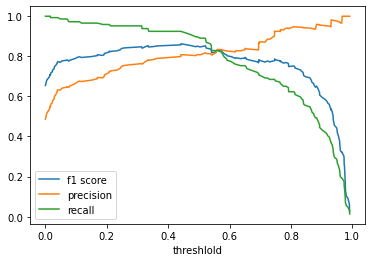

In [22]:
plt.plot(thresholds, f1_scores[:-1], label='f1 score')
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('threshlold')
plt.legend()
print(f'{np.argmax(f1_scores)}th threshold(={thresholds[np.argmax(f1_scores)]:.2f}) is the highest f1 score = {np.max(f1_scores):.2f}')


## ROC

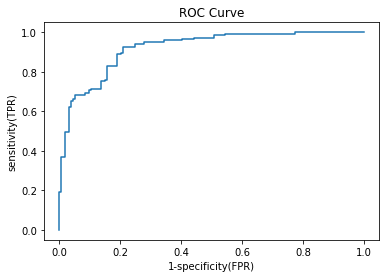

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
# 描画
plt.plot(fpr, tpr)
plt.xlabel('1-specificity(FPR)')
plt.ylabel('sensitivity(TPR)')
plt.title('ROC Curve')
plt.show()

## AUC

In [24]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.919542785981142

## 多クラスROC

In [38]:
# データ準備
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns = [y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# モデル学習
model = LogisticRegression()
model.fit(X_train, y_train)
# 予測
y_pred_proba = model.predict_proba(X_test)

### macro平均

In [39]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes = model.classes_)
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

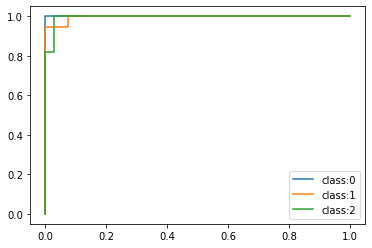

In [40]:
# それぞれのクラスのroc
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = f'class:{i}')
    plt.legend()

### np.interpの例

In [45]:
all_x = np.arange(7)
data_x = [0, 2, 5, 6]
data_y = [0, 2, 4, 6]
np.interp(all_x, data_x, data_y)

array([0.        , 1.        , 2.        , 2.66666667, 3.33333333,
       4.        , 6.        ])

In [62]:
# 必要なxの値のリスト
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# 線形補間
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr = mean_tpr / n_classes

In [51]:
mean_tpr

array([0.92087542, 0.98148148, 1.        , 1.        ])

In [53]:
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

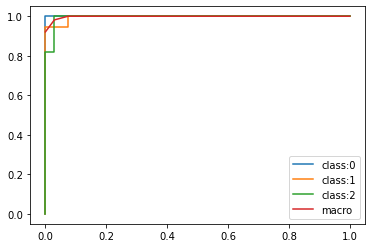

In [55]:
# それぞれのクラスとmacro平均のroc
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = f'class:{i}')
plt.plot(fpr['macro'], tpr['macro'], label = 'macro')
plt.legend()

### micro平均

In [59]:
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

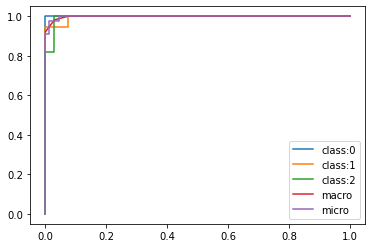

In [60]:
# それぞれのクラスとmicro平均のroc
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = f'class:{i}')
plt.plot(fpr['macro'], tpr['macro'], label = 'macro')
plt.plot(fpr['micro'], tpr['micro'], label = 'micro')
plt.legend()